In [1]:
import torch
import numpy as np

In [2]:
lines = np.array([[1,2,3], [-3,2,1], [2,2,2]])
# lines = np.array([[1,2,3]])

[1 2 3]
[-3  2  1]
[2 2 2]


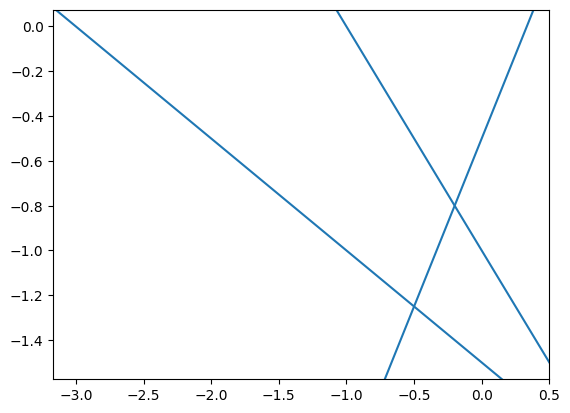

In [3]:
import matplotlib.pyplot as plt 

def plot_line(line_params):
  # If x0 is zero 
  y0 = -1*line_params[2]/line_params[1]
  # If y1 is zero
  x1 = -1*line_params[2]/line_params[0]

  return (0, y0), (x1, 0)

for line in lines:
  print(line)
  p0, p1 = plot_line(line)
  plt.axline(p0, p1)

In [4]:
class NearestApproach(torch.nn.Module):
  def __init__(self):
    super(NearestApproach, self).__init__()
    self.x = torch.nn.Parameter(torch.tensor(0.0, dtype=float))
    self.y = torch.nn.Parameter(torch.tensor(0.0, dtype=float))

  def forward(self, x):
    batch_size = x.shape[0]
    return torch.stack([
      self.x.expand(batch_size),
      self.y.expand(batch_size)
    ], dim=1)

In [10]:
def loss_fn(lines, out):
  # print(lines)
  # print(out)
  a, b, c = lines[:,0], lines[:,1], lines[:,2]
  x, y = out[:,0], out[:,1]

  # print(a, b, c, x ,y)

  num = torch.abs(a*x + b*y + c)
  den = torch.sqrt(torch.pow(a, 2) + torch.pow(b, 2))
  # print(f"Num: {num}")
  # print(f"Den: {den}")
  loss = torch.sum(torch.pow((num/den), 2))
  # print(f"Loss: {loss}")
  return loss

In [6]:
def plot_lines_and_point(out):
  for line in lines:
    p0, p1 = plot_line(line)
    plt.axline(p0, p1)

  out_np = out.detach().numpy()
  plt.scatter(out_np[0][0], out_np[0][1])

0: Loss = 2.376923
10: Loss = 1.873471
20: Loss = 1.457947
30: Loss = 1.131073
40: Loss = 0.883983
50: Loss = 0.701528
60: Loss = 0.566974
70: Loss = 0.465896
80: Loss = 0.387994
90: Loss = 0.326850
100: Loss = 0.278663
110: Loss = 0.240997
120: Loss = 0.211998
130: Loss = 0.190068
140: Loss = 0.173785
150: Loss = 0.161911
160: Loss = 0.153406
170: Loss = 0.147421
180: Loss = 0.143285
190: Loss = 0.140477
200: Loss = 0.138605
210: Loss = 0.137379
220: Loss = 0.136591
230: Loss = 0.136094
240: Loss = 0.135786
250: Loss = 0.135599
260: Loss = 0.135487
270: Loss = 0.135421
280: Loss = 0.135384
290: Loss = 0.135363
300: Loss = 0.135351
310: Loss = 0.135345
320: Loss = 0.135342
330: Loss = 0.135340
340: Loss = 0.135339
350: Loss = 0.135339
360: Loss = 0.135339
370: Loss = 0.135338
380: Loss = 0.135338
390: Loss = 0.135338
400: Loss = 0.135338
410: Loss = 0.135338
420: Loss = 0.135338
430: Loss = 0.135338
440: Loss = 0.135338
450: Loss = 0.135338
460: Loss = 0.135338
470: Loss = 0.135338
480

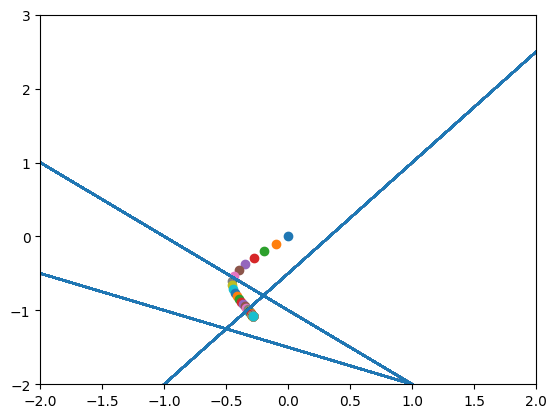

In [11]:
model = NearestApproach()
input_tensor = torch.tensor(lines)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for i in range(1000):
  out = model(input_tensor)
  loss = loss_fn(input_tensor, out)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i % 10 == 0:
    print(f"{i}: Loss = {loss.item():.6f}")
    plot_lines_and_point(out)

plt.xlim(-2, 2)
plt.ylim(-2, 3)
plt.show()

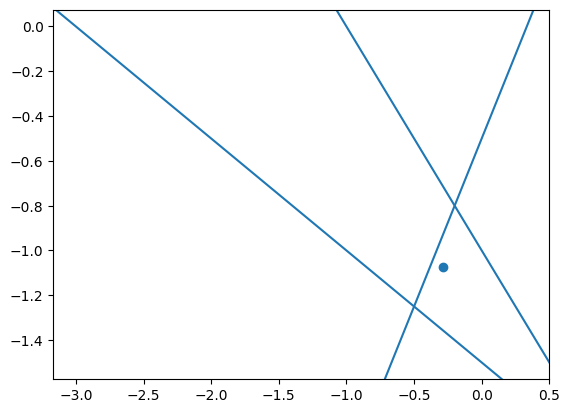

In [12]:

plot_lines_and_point(out)